In [1]:
import gym
from gym.envs.registration import register
import numpy as np
import matplotlib.pyplot as plt


# MACROS
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

num_of_episodes = 2000
discount = .99
rList=[]


In [2]:
def show_play(env, Q):
    state = env.reset()
    env.render()
    
    while True:
        action = np.argmax(Q[state])
        state, reward, done, info = env.step(action)
        env.render()
        print("State: ", state, "Action: ", action,"Reward: ", reward, "Info: ", info)
        
        if done:
            break

Success rate: 0.023


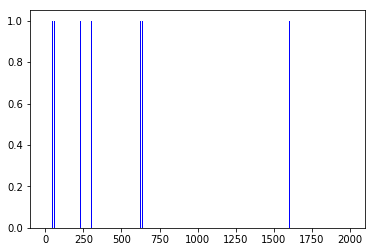

In [3]:
register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4', 'is_slippery': False}
)
# stochastic
env = gym.make('FrozenLake-v0')

#deterministic
#env = gym.make('FrozenLake-v3')
Q = np.zeros([env.observation_space.n, env.action_space.n])


for step in range(num_of_episodes):
    
    state = env.reset()
    rAll = 0
    done = False
    
    e = 1. / ((step // 100) + 1)
    
    while not done:
        action = np.argmax(Q[state])
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        new_state, reward, done, info = env.step(action)
        Q[state, action] = reward + discount*np.max(Q[new_state])
        
        rAll += reward
        state = new_state
    rList.append(rAll)
    #    env.render()  # Show the board after action
print("Success rate: " + str(sum(rList) / num_of_episodes))
plt.bar(range(len(rList)), rList, color="blue")
plt.show()
        

In [4]:
show_play(env, Q)


SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
('State: ', 0, 'Action: ', 3, 'Reward: ', 0.0, 'Info: ', {'prob': 0.3333333333333333})
  (Up)
SFFF
FHFH
FFFH
HFFG
('State: ', 0, 'Action: ', 3, 'Reward: ', 0.0, 'Info: ', {'prob': 0.3333333333333333})
  (Up)
SFFF
FHFH
FFFH
HFFG
('State: ', 0, 'Action: ', 3, 'Reward: ', 0.0, 'Info: ', {'prob': 0.3333333333333333})
  (Up)
SFFF
FHFH
FFFH
HFFG
('State: ', 0, 'Action: ', 3, 'Reward: ', 0.0, 'Info: ', {'prob': 0.3333333333333333})
  (Up)
SFFF
FHFH
FFFH
HFFG
('State: ', 0, 'Action: ', 3, 'Reward: ', 0.0, 'Info: ', {'prob': 0.3333333333333333})
  (Up)
SFFF
FHFH
FFFH
HFFG
('State: ', 0, 'Action: ', 3, 'Reward: ', 0.0, 'Info: ', {'prob': 0.3333333333333333})
  (Up)
SFFF
FHFH
FFFH
HFFG
('State: ', 1, 'Action: ', 3, 'Reward: ', 0.0, 'Info: ', {'prob': 0.3333333333333333})
  (Up)
SFFF
FHFH
FFFH
HFFG
('State: ', 1, 'Action: ', 3, 'Reward: ', 0.0, 'Info: ', {'prob': 0.3333333333333333})
  (Up)
SFFF
FHFH
FFFH
HFFG
('State: ', 2, 'Action: ', 3, 'Reward: '